In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

# Shape of the data

In [3]:
df.shape

(400, 5)

# Display 1st rows of data

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Check any null values are present

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# Drop User ID column
df = df.drop(columns = ['User ID'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Encode categorical value

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Seperate dependent and Indedependent Features

In [8]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [9]:
X.head()


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Split the dataset into training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
len(y_train)

320

# Standardize and normalize the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Building the Kernel SVM linear model

In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

# Prediction the data

In [15]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0]


# With confusion matrix visualize the data

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_train)

[[47  3]
 [15 15]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        50
           1       0.83      0.50      0.62        30

    accuracy                           0.78        80
   macro avg       0.80      0.72      0.73        80
weighted avg       0.79      0.78      0.76        80

70     0
104    0
199    0
213    0
340    1
      ..
107    0
101    0
336    1
123    0
115    0
Name: Purchased, Length: 320, dtype: int64


# Plot the confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


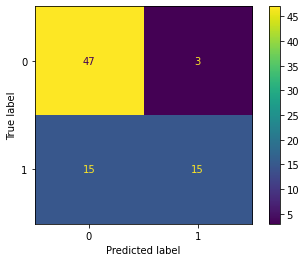

In [21]:
plot_confusion_matrix(svclassifier,X_test,y_test)
plt.show()

# Kernel SVM

In [38]:
kernel_SVM = SVC(kernel='poly')
kernel_SVM.fit(X_train,y_train)

SVC(kernel='poly')

# Prediction value with kernel SVM

In [39]:
y_pred1 = kernel_SVM.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0]


# Print the values

In [40]:
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(y_train)

[[47  3]
 [15 15]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        50
           1       0.83      0.50      0.62        30

    accuracy                           0.78        80
   macro avg       0.80      0.72      0.73        80
weighted avg       0.79      0.78      0.76        80

70     0
104    0
199    0
213    0
340    1
      ..
107    0
101    0
336    1
123    0
115    0
Name: Purchased, Length: 320, dtype: int64


## Plot the confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


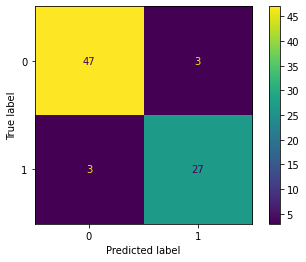

In [41]:
plot_confusion_matrix(kernel_SVM,X_test,y_test)
plt.show()

# Plotting and visualizing the result with seaborn library

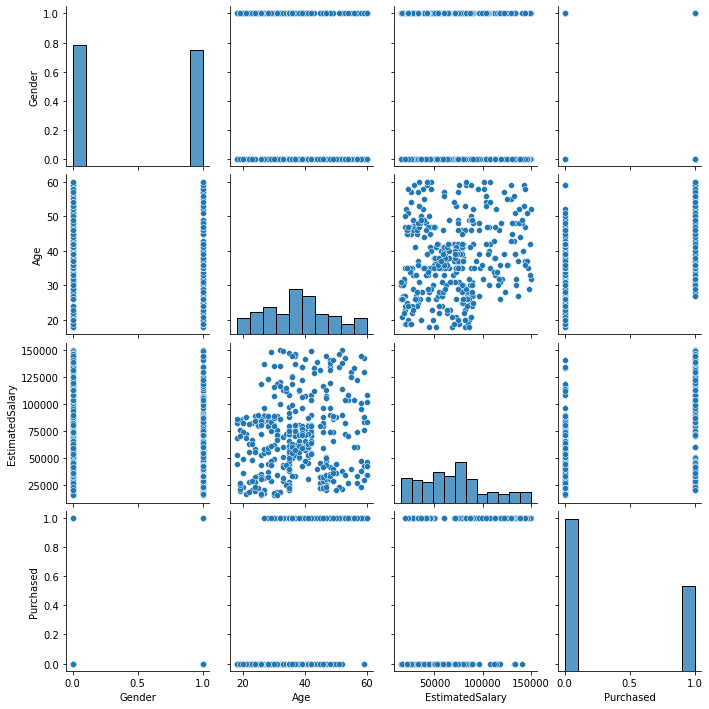

In [42]:
sns.pairplot(df)

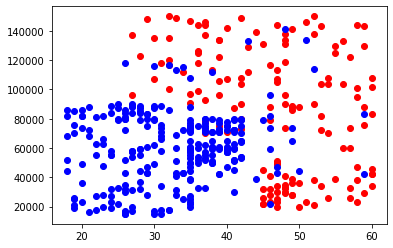

In [43]:
plt.scatter(df[df['Purchased'] == 1]['Age'], df[df['Purchased']==1]['EstimatedSalary'],c = 'red')
plt.scatter(df[df['Purchased'] == 0]['Age'], df[df['Purchased']==0]['EstimatedSalary'],c = 'blue')
plt.show()

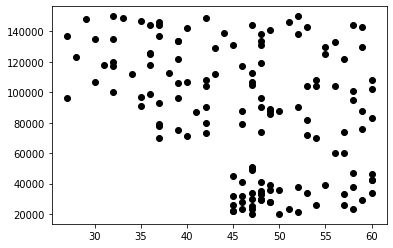

In [47]:
plt.scatter(df[df['Purchased'] == 1]['Age'] , df[df['Purchased'] == 1]['EstimatedSalary'], c = 'black')

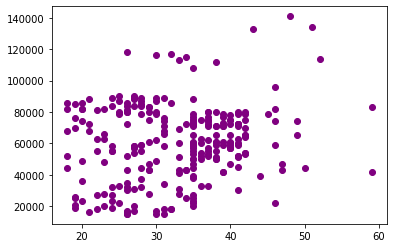

In [48]:
plt.scatter(df[df['Purchased'] == 0]['Age'] , df[df['Purchased'] == 0]['EstimatedSalary'], c = 'purple')